# Secret Societies and Revolving Doors: Using Mapping the Gay Guides to Study LGBTQ Life in the United States, 1965-1989

### Amanda Regan[![orcid](https://orcid.org/sites/default/files/images/orcid_16x16.png)](https://orcid.org/0000-0002-4260-5839) 
Clemson University

[![cc-by](https://licensebuttons.net/l/by/4.0/88x31.png)](https://creativecommons.org/licenses/by/4.0/) 
© Amanda Regan. Published by De Gruyter in cooperation with the University of Luxembourg Centre for Contemporary and Digital History. This is an Open Access article distributed under the terms of the [Creative Commons Attribution License CC-BY](https://creativecommons.org/licenses/by/4.0/)


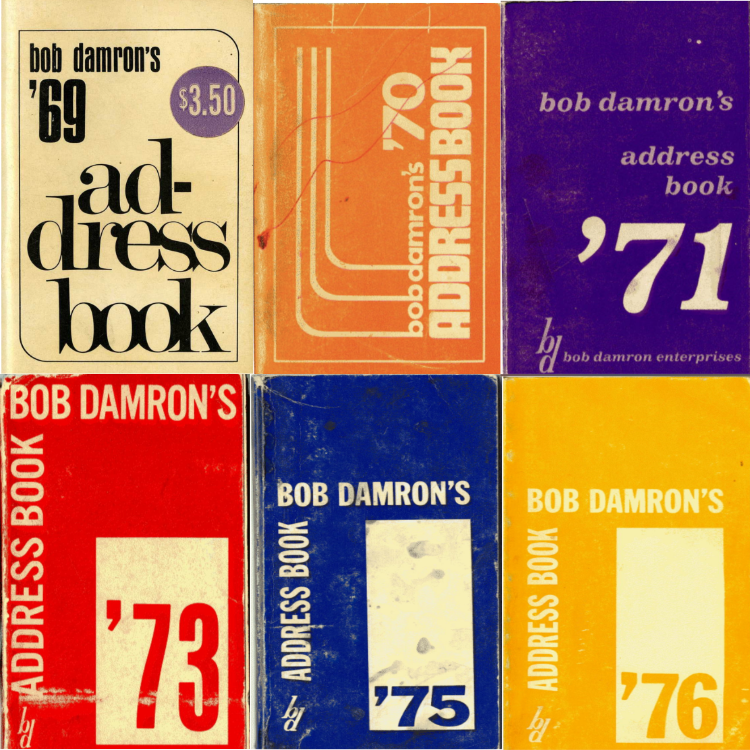

In [4]:
library("IRdisplay")
display_png(file="./media/damroncovers.png")

LGBTQ History, Mapping, Digital History, United States of America

_Mapping the Gay Guides (MGG)_ relies on Bob Damron’s Address Books, an early but longstanding travel guide aimed at gay men since the early 1960s. An LGBTQ equivalent to the African American “green books,” the Damron Guides contained lists of bars, bathhouses, cinemas, businesses, hotels, and cruising sites in every U.S. state, where gay men could find friends, companions, and sex. Through both an online interactive map and an open access dataset, _Mapping the Gay Guides_ provides tools for scholars to study queer history on a new scale. This article discusses the guides as historical sources, the methods used to create the dataset, and then demonstrates the ways in which computational methods can be used to explore aspects of this large dataset. 

## Introduction

Did Jackson, Mississippi have a LGBTQ community? That was the question posed in Carol Taff’s 1979 article for the _Jackson Daily News_ entitled “Jackson’s insular, secret society.” Twenty years prior, Taff argued, discussions of sexuality in Jackson were a mere whisper and most residents would have "scoffed at the idea that the city had a gay population of any size.” Despite this perception, however, Taff noted that it was likely that there were as many as 25,000 "full-fledged homosexuals living in Jackson" even if many had not yet “opened the closet door." The estimate came from Eddie Sandifer, the president of the Mississippi Gay Alliance. Basing this number on studies that show the number of LGBTQ Americans could be as high as 1 in 10, Sandifer noted that because "Jackson is the capital city...the percentage is higher." It was common, he explained, for LGBTQ Americans to come "from rural areas to cities where they can be more open" (<cite data-cite="627056/35Y4T6Q8"></cite>). Jackson, he argued, was a draw for gay rural Mississippians seeking community (<cite data-cite="627056/MCYBJRMH"></cite>, <cite data-cite="627056/FH6MWS7E"></cite>).

But where did these LGBTQ Jacksonians congregate and how did they find each other? The article notes that although queer life was somewhat of a "secret society" there were "obvious gay hangouts.” These hangouts included places such as “city parks, especially Smith Park downtown in the shadow of the governor's mansion,” as well as the city's two gay bars, which were unnamed. Other locations mentioned, like the Steak N’Eggs (after midnight) and local hotel cocktail lounges were more nuanced spaces that were likely not public knowledge to non-LGBTQ+ folks. It is likely queer people needed access to the city’s local networks to gain entry to such spaces (<cite data-cite="627056/35Y4T6Q8"></cite>).

For historians, descriptions of gay spaces such as the ones in the _Jackson Daily News_ are invaluable and crucial sources, describing locations no longer in existence. But they only represent the narrowest glance into what Taff and others described as a “secret society.” (<cite data-cite="627056/MCYBJRMH"></cite>, <cite data-cite="627056/FH6MWS7E"></cite>). Another entry point into these spaces are historical guidebooks that listed gay spaces in cities across the United States. There were numerous versions, but likely the longest running guide was _Bob Damron’s Address Book_. In 1979 when Taft wrote about Jackson’s insular community, the Damron Guides listed over 4,000 spaces across every U.S. state and territory representing a vibrant community. The listings in the guides likely do not represent the entirety of LGBTQ spaces in America, and there are surely blind spots in what Damron choose to include in his guides. As a white gay man from San Francisco, the guides reflected Damron’s experience and biases. Nevertheless, these directories offer invaluable data for historians. The gay guides offer another entry point into studying American queer life in the late twentieth century. 

The advent of digital technology has made studying sources like the Damron Guides easier. The guides begin in 1965 with just 785 locations in the contiguous United States. By 1985 there are 5,746 locations across the United States and its territories. Between 1965 and 1985 there are over 60,000 entries and approximately 150,000 by 2005 - a scale that could be considered “big data” by historians' standards. Of course, this data is not new but having the data in digital form allows us to ask new questions about queer life in America. 

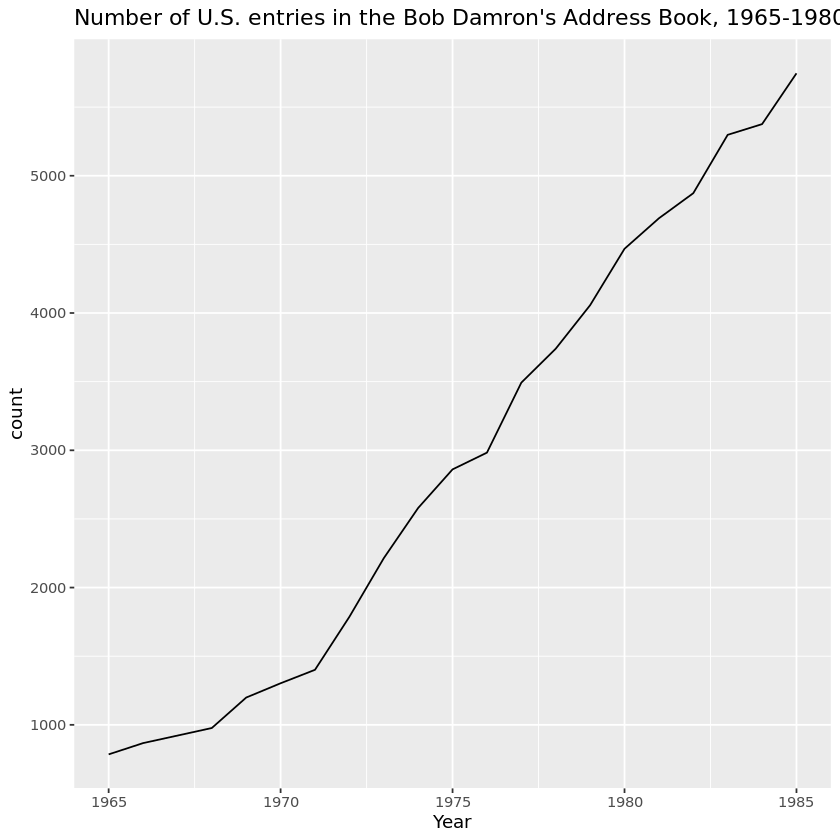

In [10]:
library(dplyr)
library(ggplot2)
mgg <- readRDS("script/data.rds")
mgg.growth.by.year <- mgg %>% group_by(Year) %>% summarize(count = n())
ggplot(mgg.growth.by.year, aes(x=Year, y=count)) +
  geom_line() + ggtitle("Number of U.S. entries in the Bob Damron's Address Book, 1965-1985")

In the last twenty years historical sources have been digitized on a scale that is almost hard to comprehend. This new abundance of digital sources and the field of digital history have changed the ways that some historians study the past (<cite data-cite="627056/H7UTBZHZ"></cite>), (<cite data-cite="627056/W73KKIZI"></cite>), (<cite data-cite="627056/EWGFL9LS"></cite>). An uneven landscape of access and digitization has complicated the use of digitized sources but, nevertheless, historians are now faced with archives of a new scale. These digitized sources allow scholars to ask and answer historical questions in new ways. As digital humanities scholar Cameron Blevins aptly described, the promise of digital history is to “radically expand our ability to access and draw meaning from the historical record” (<cite data-cite="627056/AHB59DXV"></cite>). _Mapping the Gay Guides_ seeks to do that and functions as both a tool for other researchers studying LGBTQ history and as the foundation for myself and my collaborator’s research.

[_Mapping the Gay Guides_](http://www.mappingthegayguides.org) (MGG) began in 2019. It is a collaboration between Dr. Amanda Regan and Dr. Eric Gonzaba (California State University, Fullerton). The project initially began by focusing on just the U.S. South but expanded when the project received seed funding from California State University, Fullerton. The project launched in February 2020 with an initial data set for 1965 through 1980. In 2021 the project [received a three-year grant from the National Endowment for the Humanities (NEH)](https://www.mappingthegayguides.org/news/neh-funding/) to support the expansion of _Mapping the Gay Guides_. This generous support comes from the Humanities Collections and Reference Resources program within the NEH’s Division of Preservation and Access. The grant has funded the extension of MGG from 1981 through 2005 and the redevelopment of the project's map and other visualizations. This article draws on the data from 1965 through 1985. The remainder of the data from 1986 through 2005 is still being processed but we anticipate releasing it in the Summer or Fall of 2024. 

_Mapping the Gay Guides_ (MGG), a digital history project, digitizes and turns _Bob Damron’s Address Books_ into data that can be used to study, analyze, and complicate stories about communities like Jackson. Using Jackson, Mississippi’s supposedly “insular, secret society” as a jumping off point, this paper discusses the ways that MGG can be a tool for scholars seeking to locate LGBTQ life in America. Through the [project’s website](https://www.mappingthegayguides.org), [interactive mapping visualization](https://www.mappingthegayguides.org/viz/map), and [open access dataset](https://github.com/MappingtheGayGuides/MGG-Data), MGG hopes to be a platform and tool for advancing the historical study of LGBTQ spaces, places, and people. 

## Bob Damron and the _Damron Address Books_

Living in Los Angeles, California in the 1950s and 1960s Bob Damron made his career in the bar and hospitality industry. He owned several gay bars during this period and frequently travelled for his business. While traveling, he frequently sought out friends, companions, and safety at friendly businesses. In the early 1960s he began cataloging gay spaces and jotting down the names of the spots he frequented, sometimes loaning out his notebooks to fellow gay friends to take with them on their own journeys. These prolific lists became the basis for his travel guide, _Bob Damron’s Address Book_, which he began publishing in 1965. These travel directories became survival guides for many gay and queer travelers across the United States. First published in an era when homosexuality was illegal in nearly every state and classified as a psychological disorder by the American Psychiatric Association's Diagnostic and Statistic Manual of Mental Disorders, these travel guides helped gays and lesbians find bars, cocktail lounges, bookstores, restaurants, bathhouses, cinemas, and cruising grounds that catered to people like themselves. Much like the Green Books of the 1950s and 1960s, which African Americans used to find friendly businesses that would cater to Black citizens in the era of Jim Crow apartheid, Damron’s guidebooks aided a generation of queer people in identifying sites of community, pleasure, and politics. The gay guides provided people with a list of spaces where they could feel safe in revealing their true selves. Small, discrete, and pocket-sized these guides functioned as a map to a world that often, out of necessity or preference, was veiled from public view. 

Within each guide, listings were grouped by state then by city. A typical entry in the guide includes the name of the establishment, an address, sometimes notes or warnings, and often an “Explanation of Listings” which were lettered designations describing Damron’s categorization of the location. For example, a location may contain a “(D)” next to it indicating that it is a popular location for dancing. As the guides grow in popularity during the 1970s Damron revises the categorizations he uses, expands the types of locations he includes, and increases the number of locations included within the guides. For example, in 1965 Damron listed just twelve amenity categorizations but by 1975 that had grown to over twenty different categorizations. The types of locations expanded too. Damron began adding religious institutions and groups as well as public cruising areas to the guides in the 1970s. Initially only focused on the United States, he also expands to include U.S. territories and foreign countries. 


The guides are not, however, an unbiased representation of gay spaces in the United States and in fact they are rather incomplete for groups other than gay white men. Damron's guides served a particular consumer base, one that skewed male and white, and were ultimately a reflection his own experience as a white upper middle class gay man. For example, the guide's explanation of listings mentioned women, initially describing (G) as “Girls, but seldom exclusively.” This categorization likely referred to places where lesbians, bisexuals, queer women, or straight women could share bar space with gay men. However, while gay men could patronize a robust world of bars, porn cinemas, and bathhouses by the late 1970s, spaces geared toward women were frequently not accounted for or rare in the guides. Looking at other travel guides aimed particularly at women, such as _Gaia's Guide_, reveals a very different geography for lesbian women at this time. In Damron's guides cities such as Berkeley, a city with important spaces for lesbian women, never appear. During the 1990s the guides begin to be marketed as exclusively catering to men and the Damron company started publishing the women’s specific guide, _The Damron’s Women Traveller_. Due to the popularity of alternative guides, _Damron's Women Traveller_ was never successful for the company. Their absence from the guide was a reflection of Damron's primary customer base. Perhaps lesbian, queer, bisexual, and questioning-women found more acceptance in other spaces not highlighted in the Damron Guides, like coffeehouses and feminist organizations (<cite data-cite="627056/BQGQSBM9"></cite><cite data-cite="627056/BQGQSBM9"></cite>).

While academic queer history has been embraced the past few decades, scholars using digital methodologies have been slower to apply their work to LGBTQ subjects. In recent years, however, scholars have begun to take advantage of geospatial mapping technologies to produce historical LGBTQ mapping projects such as _Queering the Map_, _Queer Digital History Project_, _Mapping LGBTQ St. Louis_, _Mapping Queer Terrains_, and _Shifting LGBTQ+ Spaces_. _Queering the Map_, for example, is an ambitious and worthwhile project that seeks to map LGBTQ space through crowdsourced memories from the community as its source base. Other projects, such as _Mapping LBGTBQ St. Louis_, the _LGBTQ Columbia History Initiative_ and _An Everyday Queer New York_, provide rich portraits of local communities. _Shifting LGBTQ+ Spaces_, which is built in part on data obtained from _Mapping the Gay Guides_, also seeks to map historic LGBTQ locations over time and offers tools to track the longevity of individual locations in several U.S. cities. Other projects have sought to expand beyond guidebooks and use other types of historical sources to understand gay spaces. For example, Annelise Heinz and Cameron Blevins’ work, [“Putting Lesbian Community Building on the Map,”](http://www.cameronblevins.org/research/) studies how lesbian feminists built community during the 1970s and 1980s through mapping thousands of locations printed in the bimonthly magazine _Lesbian Connection_.(<cite data-cite="627056/EL5MY6D7"></cite>, <cite data-cite="627056/IUSM6CXH"></cite>,<cite data-cite="627056/ZFB8C43K"></cite>,<cite data-cite="627056/5Q6YDESU"></cite>,<cite data-cite="627056/JDE5YLWH"></cite>, <cite data-cite="627056/EKEPFPVQ"></cite>, <cite data-cite="627056/W5LUZA54"></cite>).

## Turning the _Damron Address Books_ into Historical Data

Turning a historical document, such as the Damron Address Books, into data that can be used for mapping is a process fraught with methodological decisions that shape the resulting dataset. The goal of this section is to make visible the choices that the project team has made when transcribing and categorizing the data. The MGG project team views the dataset and project visualizations as both output for a public audience seeking to understand their own community’s history and as tools for researchers interested in studying a variety of topics related to historical gay life in the United States. Therefore, differentiating between the different ways that latitude and longitude coordinates were determined and documenting how the data was constructed, is essential in making this data open and accessible. 

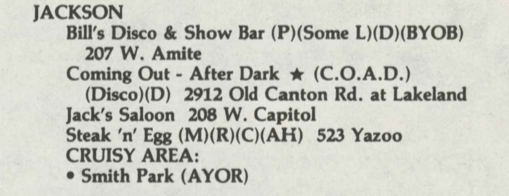

In [7]:
display_png(file="./media/exampleoflistings-1982.png")

The Damron Guides have historically been scarce and hard to access. Only one library in the United States has an entire run and although the Damron Guides have been digitized up until 1980 they are only available via an academic subscription to the Alexander Street LGBT Thought and Culture database. The MGG Team has worked in collaboration with the ONE Archives at the University of Southern California to digitize the guides from 1981 through 2005. These guides will soon be available through USC’s library. However, digitization is only one step toward mapping this data. In order to generate maps and visualizations based on the Damron Guides, it is first necessary to first transcribe the data included in the digitized images of the guides into text that is machine readable.

The image above shows an example of listings in the Damron Guides. They are grouped by state and then by city. A typical entry includes the name of the establishment, an address, sometimes notes or warnings, and often an “Explanation of Listings” which are the lettered designations describing Damron’s categorization of the location such as “(D)” for dancing. The amenities changed over time and Damron regularly added, removed, or changed the amenity for some categories. One notable change is the amenity (G) for “Girls, but seldom exclusively” which appears in the 1960s guides but is later changed to (L) for “Ladies” and eventually (W) for “Women” in the 1990s. This presents a unique challenge for displaying this data. Another is the category (B) which initially stands for "Blacks Predominant" and later is changed to "Blacks Frequent". In the 1990s this category is changed entirely and appears as (MRC-AF) for "Multi-Racial Clientele - African American." The changes in the language used to describe amenities is significant and alludes to the way the guides were used. In the case of (B), for example, the categorization likely served as a warning to white male patrons who would not want to visit a space that wasn't segregated. The amenity categorization that Damron used reflected a particular social vision of the gay world and it is crucial to grapple with the ways this shapes the dataset. Our data mirrors the information included in each listing as closely as possible and tries to create a faithful recreation of the primary source. We purposely maintain the categories that Damron used because they are important for understanding the social context in which the terms were used. Questions of representing categories like the ones Damron includes are related to a larger scholarly literature about data, archives, and specifically queer data. <cite data-cite="627056/6XNQ46KX"></cite>, <cite data-cite="627056/JTU645HJ"></cite>, <cite data-cite="627056/CSIULZQI"></cite>

While we have chosen to maintain the categorization assigned by Damron and we use the term “Amenity Feature” to describe these categories, we have also added our own classification in the “Type” field. Between 1965 and 1983, the type field goes beyond Damron’s categorization by describing locations as one or more of the following types: Bars/Clubs, Hotels, Church, Theatre, Restaurant, Business, Baths, Book Stores or Cruising Area. While some of our type designations overlap with Damron’s categorization, we note that locations can often function as multiple types. For example, many bars were located inside hotels and in order to track this unique kind of space we’ve made these locations both bars and hotels. Likewise, in the cases where a straight establishment (like a mall) is noted for being “Cruisy” but is not listed under Cruising Areas in the guide, we’ve assigned the type of location as Cruising Area. As the guides grow in length the diversity of business types increases but Damron’s own classification system does not account for the rise in bookstores, theaters, or escort services listed in the guides. We’ve added categories to account for such locations making the type classification more robust and nuanced than Damron’s. 

In [61]:
geocode.status <- mgg %>% group_by(status) %>% summarize(count = n())
geocode.status <- geocode.status %>% mutate(Percentage=paste0(round(count/sum(count)*100,2),"%"))
geocode.status

status,count,Percentage
<chr>,<int>,<chr>
Geocoded,110,0.18%
Google Verified Location,40049,65.98%
Location could not be verified. General city or location coordinates used.,7041,11.6%
Verified Location,13498,22.24%


After transcribing and categorizing the data contained in the guide, it was necessary to associate the location’s address with spatial longitude and latitude coordinates so that they could be plotted onto a map. This process is known as geocoding. Roughly 34% of the entries included in the Damron Address Books between 1965 and 1985 were addresses that we deemed “unclear.” This meant that the addresses were either vague and un-mappable locations (i.e. “Inquire Locally” or “U.S. Hwy 67”) or were locations that had descriptive street addresses that required us to identify them by hand (i.e. Rice Park or ‘Primrose Path’ – Senate St. near Capitol). Of these “unclear locations” we were able to identify correct locations for more than half. Addresses listed as “Verified Locations” denote the locations that were found by hand and make up about 22% of the dataset.

However, there were many locations in which we were unable to associate a geographic location. Often these were locations that simply stated “Inquire locally” or where the location was simply too vague to confidently identify. These locations make up 12% of the dataset and are marked by a note in the status column that reads: “Location could not be verified. General city or location coordinates used.” Rather than ignoring these locations, we have opted to use general city coordinates for them. This means, however, that the default map shows all locations and there are frequently clusters of locations with general coordinates mixed with verified locations. We’ve opted to include these locations by default to demonstrate the growth of LGBTQ spaces over time; however, we recognize that these locations can be somewhat misleading. Therefore, we have included a checkbox on the map controls that will filter the map to show only verified locations.

The resulting dataset has a column that differentiates between three types of locations: 
* **Google Verified Location:** A location that was able to be verified using Google’s Geocoding API.
* **Verified Location:** If a location was not a standard address that could be geocoded, we attempted to verify it manually. A “verified location” means that the location was verified manually by a member of the MGG team.
* **Location could not be verified.** General city or location coordinates used: For locations that our team was not able to verify manually, we’ve opted to include the general coordinates for the city. Because these generalized locations can skew the map and provide a false sense of the geographic landscape of a city, we’ve included a checkbox on our app that allows users to filter out these locations and look only at verified locations. However, we’ve opted to include them by default in the map in order to depict the scale of the growth in LGBTQ establishments between 1965 and 1985.


It would be remiss not to mention that digital history is inherently collaborative and that is especially true for this project. Although this article is single authored, _Mapping the Gay Guides_ is a collaboration between myself and Dr. Eric Gonzaba. By the time the project is finished, MGG will feature more than 150,000 locations. Creating this data is a monumental effort and it wouldn't be possible without our team of Graduate Research Assistants and interns. Most of the transcription has been completed by Graduate Research Assistants in the Department of American Studies at California State University, Fullerton with smaller sections completed by interns from the Irma Lerma Rangel Young Women's Leadership School and St. Mary's University. The work to identify and locate unclear addresses can be attributed to graduate students at Clemson University and in particular, Lucas Avelar, who is a Ph.D. student in Clemson's Digital History Ph.D. program and has served as the project's Data Manager during his first two years at Clemson. A full list of the team that has made this project possible over its lifecycle can be found on [the project's website.](https://mappingthegayguides.org/about/)

## _Mapping the Gay Guides_: A Tool for Visualizing Gay Life

Despite its limitations, the data in Damron’s guides is still valuable. MGG takes the guides and digitizes then transcribes them. The result is usable, functioning data that allows researchers to make connections between historical queer communities. Mapping this data allows researchers and community members to examine the distribution of locations and explore the growth of the queer communities over time. In the U.S. South, for example, you can explore 154 queer spots across twelve states in 1965 to over a thousand locations in those same states by 1980. Damron’s use of letters and symbols to designate certain features of bars (the “B” for “Blacks frequent,” for example) allows users to navigate through nuances in queer geography. _Mapping the Gay Guides_ turns the incredible textual documents of gay travel guides into accessible visualizations, useful in exploring change in queer communities over time.

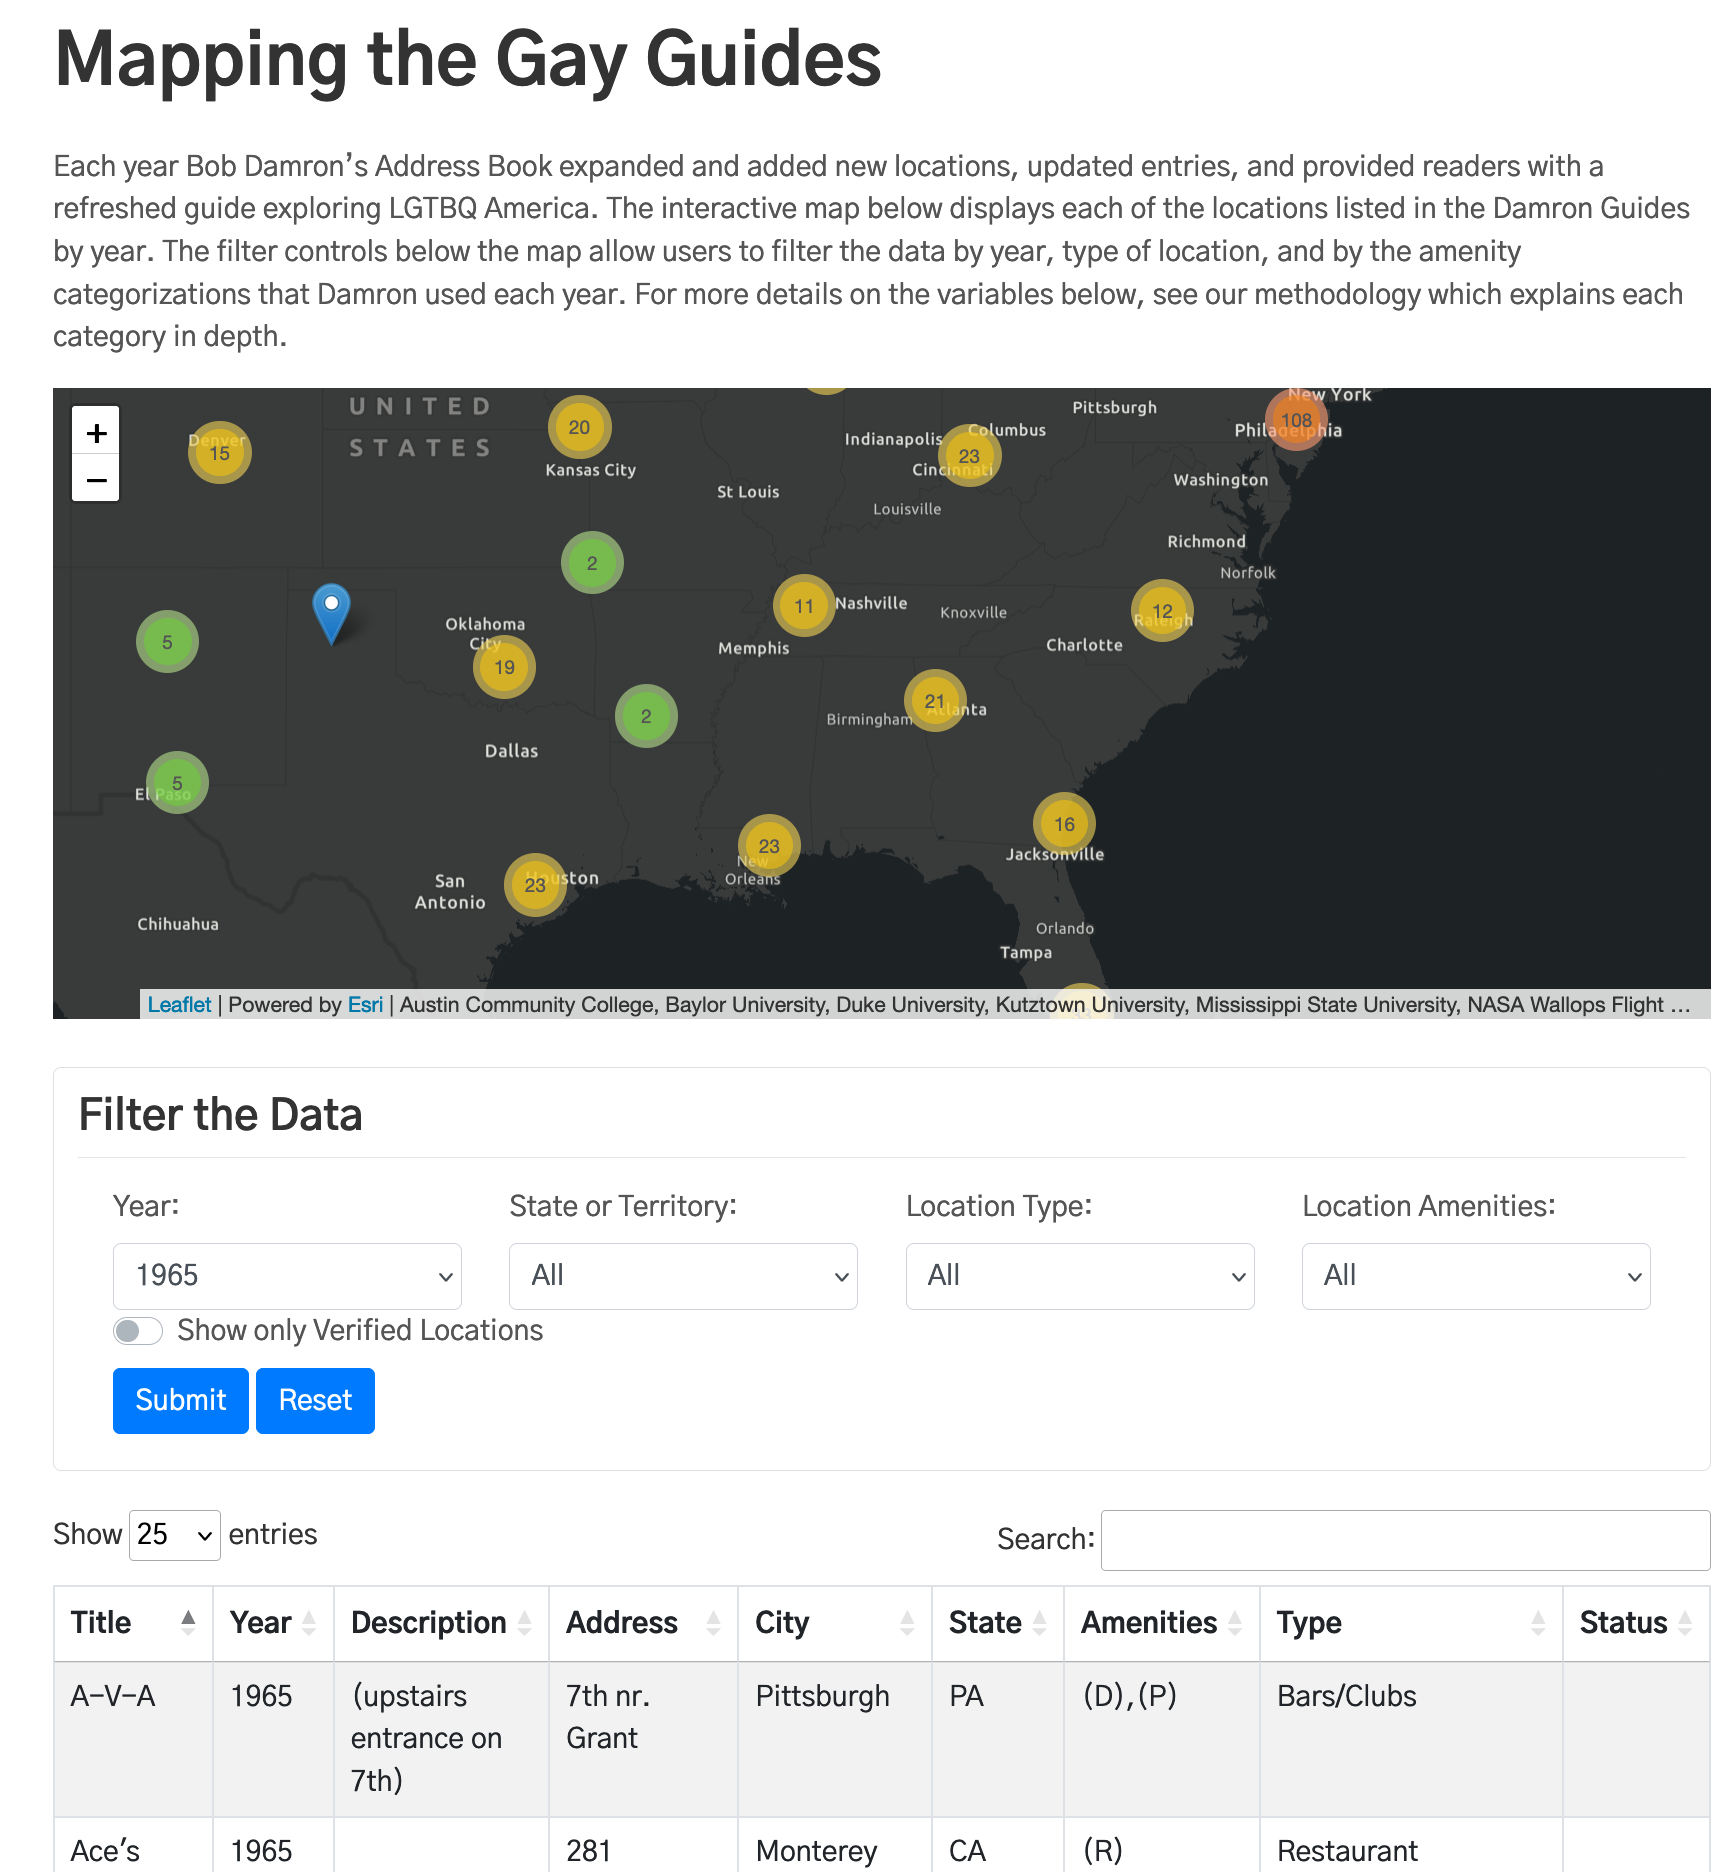

In [8]:
display_png(file="./media/mgg-map.png")

Returning to the example of Jackson, it is possible to use the mapping visualization on the MGG website to zoom in on Mississippi specifically and examine the entries across multiple years. The map reveals that by 1985 there were 57 entries in Mississippi, up from just 7 in 1965. Given the dramatic changes that occurred for LGBTQ Americans in the 1970s, growth is not overly surprising. Zooming in allows users to look specifically at Jackson in 1980 where just three locations appear: Mae’s Cabaret, the Holiday Inn, and Smith Park which is noted to be (AYOR) or “At Your Own Risk” signaling the potential of police presence in the park. 

In [17]:
jackson.1980 <- mgg %>% filter(city == "Jackson" & state == "MS" & Year == 1980) %>% select(title, description, streetaddress, amenityfeatures)
jackson.1980

title,description,streetaddress,amenityfeatures
<chr>,<chr>,<chr>,<chr>
Holiday Inn,,,Cruisy Area
Mae's Cabaret,"(Some ladies) (Sun. - Thur. 8-12pm, Fri. & Sat. 8pm-3am) (Disco on weekends) (Occasional shows)",207 W. Amite,"(P),(D),(L),(PT),(BYOB),(WE),(*),(S)"
Smith Park,,,"Cruisy Area,(AYOR)"


In [55]:
library(leaflet)
jackson.1980.map <- mgg %>% filter(city == "Jackson" & state == "MS" & Year == 1980) %>% select(title, description, lat, lon)
jackson.map <- leaflet(data = jackson.1980.map) %>% addTiles() %>% addMarkers(~lon, ~lat) %>% setView(-90.18481,32.298757, zoom=14)
jackson.map

HTML widgets cannot be represented in plain text (need html)

The guides were constantly evolving and the details of Damron’s methodology for including entries, especially in the early editions of the guide, is unknown. However, the “Publishers Notes” in each edition suggest that the guides were a mix of locations that Damron identified while traveling the country and crowdsourced information from individuals and businesses who would send letters. For example, in the 1969 guide’s “Publishers Note” Damron wrote that he had “traveled to nearly forty states” but he would "welcome letters from our many readers, and will be most appreciative of any errors, additions or other information” (<cite data-cite="627056/ISYCLYW3"></cite>). By 1976, Damron offered complimentary copies of the guide for “correspondents who have contributed useful, accurate and bonafide information” (<cite data-cite="627056/C5S4Y4RQ"></cite>). Reader suggestions were crucially important to maintaining the guide’s accuracy and relevancy. They helped keep the guide up to date and provided Damron with on the ground information about spaces that were not openly gay serving establishments but were co-opted as hangouts.

Surely there were locations that never appeared in the guide or that appeared in the guide and were inaccurate. Business owners may not have known about the guides and therefore never submitted their location. The establishment and its patrons may have wanted secrecy and avoided being included in the guides. Or, it may have been Damron’s decision not to include locations that were fleeting, unpopular, or where he disliked the ownership. In some locations the guides were sold onsite and it was common to see Damron commonly called out establishments in the text for being delinquent in paying him for the copies they received.  For example, in 1981 Damron added a note to the listing for Wilmington, Delaware’s bar, Renaissance: “Biz must be bad as they refuse to pay me for their Address Books 1-15-80” (<cite data-cite="627056/NU85NDSA"></cite>). It is also likely that Damron’s data was, at times, out of date. Due to the yearly publication schedule listings were actually compiled the year before the guide was released. In the case of Renaissance, the note added by Damron is dated 1-15-80 even though it appears in the 1981 edition of the guide. If a location closed soon after the publication of a new guide, there was a yearlong delay to remove it. It’s notable that, in comparison to the locations mentioned in Taff’s article, the 1980 guide reflects a smaller number of locations. The Steak N’ Eggs, for example, does not appear in the guides until 1981. It took time for the guide to reflect local trends and locations. 

## Data Download

[data.rds](https://github.com/regan008/mggjdh/blob/master/script/data.rds?raw=true)

## Jackson: A View from the Guides

Jumping off from the 1979 description of Jackson as an “insular and secret society,” it is possible to explore and question Sandifer's assumption as well as to explore how Jackson's queer landscape shifted in the 1980s using the dataset provided by MGG. To begin its worthwhile to look at Jackson's growth in the 1970s and 1980s. According to the US census it grew 31.8% between 1970 and 1980 and had a population of almost 203k (<cite data-cite="627056/RUF8CLEB"></cite>). It was also the state capital and therefore the seat of governmental power in the state - a fact reflected by the framing of Smith Park, a popular cruising location, as “in the shadow of the governor’s mansion” (<cite data-cite="627056/35Y4T6Q8"></cite>). Jackson was Mississippi's largest city in the 1970s, but was still quite small compared to other capital cities, including in the south. Other capitals in the south including Atlanta and Richmond were far larger, more urban, and had a larger number of entries in the guides.

Regardless of the size of the capital city, Sandifer suggested that it was Jackson’s position as a capital city that was, in part, responsible for the larger LGBTQ community. “Jackson is the capital city,” he explained, “so the percentage is greater. They come from rural areas to cities where they can be more open” (<cite data-cite="627056/35Y4T6Q8"></cite>). However, Jackson was no “Mecca for free-wheeling open homosexuality” Sandifer cautioned. The price to come out of the closet in Jackson, he explained, was often too great. Instead, Jacksonians gathered in private homes or visited gay bars in other cities while on out-of-town business trips. Although Sandifer never mentions the guidebooks, they were a resource for exactly the kind of people that Sandifer describes. They would have been a resource and useful introduction for anyone new to Jackson who was looking to gain access to the city’s LGBTQ community. 

The MGG website's interactive map is a useful starting point for understanding the gay community in Jackson. For example, in Jackson the 1965 guide listed just 3 locations: a mixed sports lounge, the Robert E. Lee Hotel Bar, and a bar called Wagon Wheel which was also noted to be a mixed location indicating the presence of both hetero and homosexual patrons. In other words, the Wagon Wheel was often a straight space that could be, and was often, co-opted by LGBTQ people. By 1985 that landscape had changed dramatically. In addition to growth in the number of locations from just 3 in 1965 to 16 in 1985, there was also more diversity in the types of locations listed. New types of locations such as advocacy groups, support hotlines, religious institutions and groups, and publications appeared. About 7.6% of all locations in 1985 fell into these categories. This growth in both the number and diversity of locations does not disprove Sandifer's description of the city as an "insular and secret society" but it does suggest that the community was growing and new services geared toward LGBTQ Jacksonians were emerging.

While looking at change in Jackson could be easily accomplished by flipping through multiple editions of the physical guides, other questions would be much more difficult to answer this way. The map's filters offer a starting point for asking more sophisticated questions of the data. For example, users may use the Type filter to ask questions about where, when, and how many religious institutions appeared in the guides. Although the Metropolitan Community Church (MCC) does appear for a time as an amenity in the 1970s, Damron offers no categorization for religious entities and even the (MCC) amenity, when it appears, is incomplete because it leaves out Catholic and other groups that appear in the guides. Questions about amenity categorizations are equally valuable. For example, users may seek to study risk or danger in the guides through filtering by the "(AYOR)" or "(HOT)" amenities. 

The visualization on the website is useful for asking questions about where or when locations appeared but by its nature, it is limited and for more complex questions we must turn to the data provided by the project. Using the map alone, it isn't possible to query for comparisons or statistics which is why _Mapping the Gay Guides_ also provides all the data in an easily accessible format. The data that powers our website and interactive visualizations, is an ideal data set for computational methods and exploratory data analysis which allow for more a more nuanced and sophisticated analysis. 

For example, since Jackson was the capital city and unique in Mississippi because of that, we might compare it to other capital cities. Looking at the number of locations in Damron Guides in capital cities over time reveals that not all capital cities are comparable. Capital cities often had more locations than any other city within a state, however when looking at the overall trend, the drastically different sizes and urban-rural classifications of capital cities across the country make them incomparable. This trend is visible when we look at the number of locations, over time, in each capital city: 

`summarise()` has grouped output by 'city', 'state'. You can override using the
`.groups` argument.


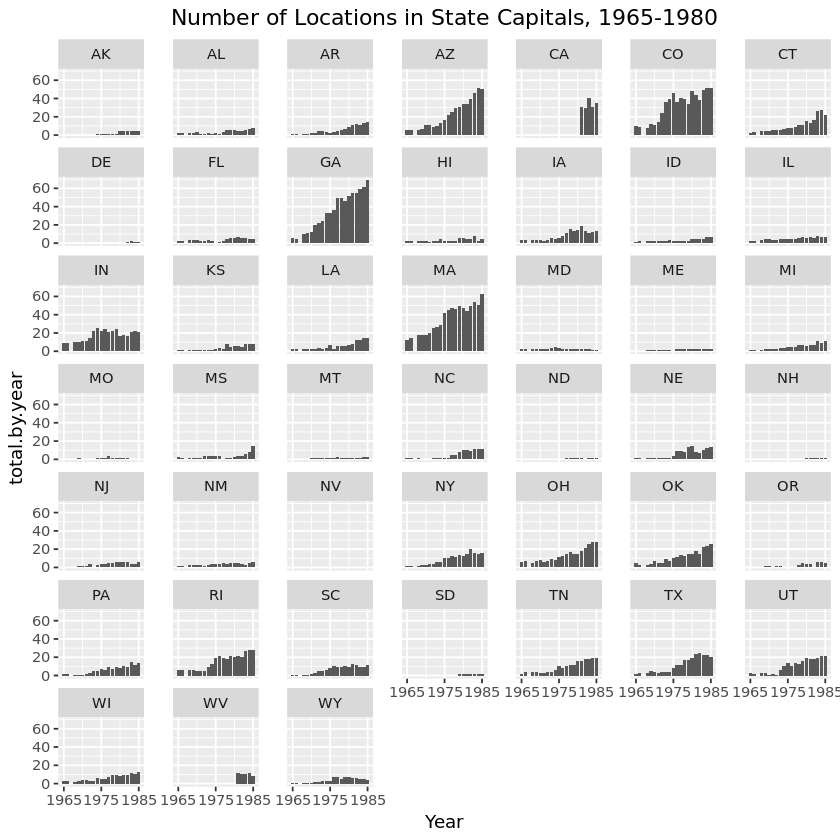

In [56]:
capitals <- read.csv(file = "script/statecaps.csv", sep = ",", header=TRUE) 
capitalcities <- mgg %>% filter(city %in% capitals$city & state %in% capitals$state)
capitalcities <- semi_join(x=mgg, y=capitals, by=c("city", "state"))

total.capital <- capitalcities %>% group_by(city, state, Year) %>% summarize(total.by.year = n())
total.capital <- merge(x = total.capital, capitals)
fig2 <- ggplot(data=total.capital, aes(x=Year, y=total.by.year)) + geom_bar(stat="identity") + facet_wrap(~state) +ggtitle("Number of Locations in State Capitals, 1965-1980") + scale_x_continuous(n.breaks = 3) + theme(plot.title = element_text(hjust = 0.5)) + theme(panel.spacing.x = unit(6, "mm"))
fig2

At first glance it appears that a city like Atlanta consistently had a much more robust LGBTQ community. However, that’s a bit misleading due to population sizes. Atlanta, a major urban city in the 1980s, had a population of over 1.5 million whereas Jackson had a population of just over 202k. A more useful measure is to look at the number of locations per ten thousand people in a city. That changes the viewpoint of capital cities in states like Montana, West Virginia, and Wyoming where that measure is surprisingly high. Looking at the Damron data from this vantage point, it is clear that Jackson’s population was growing and was actually much more comparable to somewhere like Atlanta where in 1980 there were .32 locations per ten thousand people. In Jackson it was .11 per ten thousand in 1980 but by 1985 it rose to .56. An increase from just 3 locations to 15 in 1985. It suggests that Sandifer’s characterization of Jackson could apply to other cities as well. They tended to be a draw for other LGBTQ people in their state.

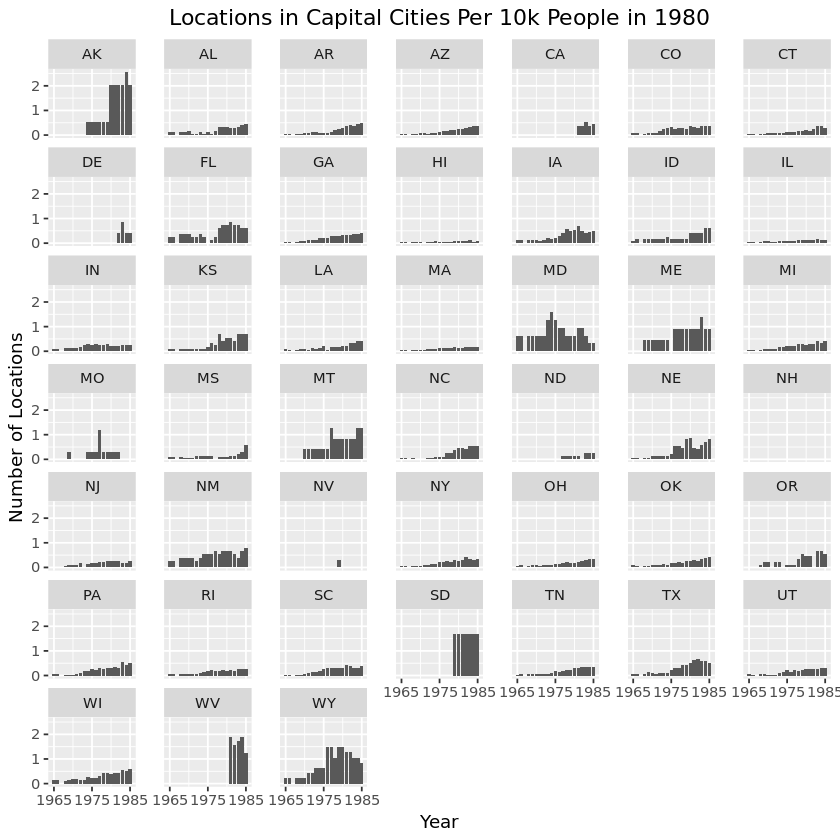

In [45]:
total.capital <- total.capital %>% mutate(locations.per.10k = total.by.year/pop1980 * 10000)
fig3 <- ggplot(data=total.capital, aes(x=Year, y=locations.per.10k)) + 
    geom_bar(stat="identity") + facet_wrap(~state) + 
    ggtitle("Locations in Capital Cities Per 10k People") + 
    ylab("Number of Locations") + scale_x_continuous(n.breaks = 3) + theme(plot.title = element_text(hjust = 0.5)) + theme(panel.spacing.x = unit(6, "mm"))
fig3

In some ways its unsurprising to see such growth in the early 1980s. The guides chronicle an important moment in LGBTQ history: the dramatic transformation in gay and lesbian life in the United States that occurred between Stonewall in 1969 and the start of the HIV/AIDS epidemic in 1981. Listings in the Damron guides drew exponentially during that period from just 1,199 locations in 1969 to 4,690 by 1981 — a 291% increase. By 1985 the number of listings had jumped another 28% to 5,746. In many ways the growth in the Damron guides is an indicator of LGBTQ visibility and activism elsewhere in the 1970s. During this decade LGBTQ issues saw far more visibility in mainstream straight culture and witnessed political momentum and gains in some places. Gay Pride week was established, and homosexuality was finally removed from the American Psychiatric Association’s list of psychiatric disorders.(<cite data-cite="627056/XK5GR6B6"></cite>,<cite data-cite="627056/IZEBN4L7"></cite><cite data-cite="627056/3EB26AGP"></cite>). Moreover, it is clear from Damron’s guides that these gains were felt everywhere, not just in the bi-coastal cities of New York and San Francisco. Further study would be required to evaluate the local politics of the individual cities across America that appear in Damron's guides in the 1970s. However, their mere appearance suggests at least a more visible community of gay and gay friendly establishments in cities across the country. Of course, gains also often triggered backlash. For example, the passage of an anti-discrimination bill in Miami in 1976 led to local backlash and the rise of figures like Anita Bryant who argued that these laws would discriminate against her "children's right to grow up in a healthy, decent community" (<cite data-cite="627056/HJ8UFRQ9">,<cite data-cite="627056/5EVQ3PKH"></cite>,<cite data-cite="627056/5EVQ3PKH"></cite>,</cite>,<cite data-cite="627056/3EB26AGP"></cite>,<cite data-cite="627056/LISYVMBU"></cite>,<cite data-cite="627056/K9GUWXQP"></cite>,<cite data-cite="627056/IZEBN4L7"></cite>,<cite data-cite="627056/VK5H7GZC"></cite>,<cite data-cite="627056/VK5H7GZC"></cite> ,<cite data-cite="627056/LCBRVFA6"></cite>,<cite data-cite="627056/A3D8FE94"></cite>,<cite data-cite="627056/XK5GR6B6"></cite>).

The growth in locations in the guide is a measure that does not necessarily require computational analysis to study. It is evident from looking at the guides themselves which grow in thickness from just forty-eight pages in 1965 to seven-hundred seventy by 2000. It is also recognizable looking at the map on the MGG website. However, there is another component to the data that is easier to study with the use of computation: the ways in which the Damron guides signaled danger.

## Signaling Danger in the Guides

The looming threat of sodomy laws, police harassment, arson, and other violence toward the LGBTQ community is present throughout the guides. Police raids on gay bars, common in the 1960s, continued into the 1970s. Cruising areas were also surveilled and patrolled by police often undercover (<cite data-cite="627056/K9GUWXQP"></cite>, <cite data-cite="627056/A3D8FE94"></cite>, <cite data-cite="627056/8SCHA9SR"></cite>). Damron accounts for these realities in several ways. First, he has categorizations that signal the potential presence of police at locations. (HOT) appears in the guides for the first time in 1975, although it was used sporadically before appearing in the “Explanation of Listings” at the beginning of the guide. Noting the potential for police activity (HOT), the guides explained, “means dangerous . . . fuzz . . . not ‘in’ as in the current vernacular” (<cite data-cite="627056/H4GSCZX8"></cite>). It appeared for a few years before eventually being replaced by “At Your Own Risk” (AYOR) but the two categories were linked. In the 1978 Damron explained that cruisy areas, which included parks, beaches, highways, ‘rest stops’ and other public facilities, could be “extremely dangerous (HOT) for various reasons and should be visited strictly at your own risk.” Often this warning was amplified within the listings itself. In 1978, for example, the guide left a note above cruising areas in Long Beach, California that read: “Fuzz very active — all AYOR” (<cite data-cite="627056/MXBL88U2"></cite>).

But there were other hints of risk throughout the guides aside from these two categories. Damron would frequently list locations with “inquire locally” in place of an address. He may have done this for many reasons. It is possible Damron knew of the location but didn’t have an exact address for it. Occasionally he noted when a location was new and he didn’t yet have firm location details. For example, in 1980 the guides listed Echo Farms, a bar in Chattanooga, Tennessee, and explained that it was “supposedly opening soon” and readers should “inquire locally.”  While listings like this do appear, it is also possible, that Damron was asked not to print the address of certain locations meaning that the location was one that had to be accessed via whisper networks within the individual community. Sometimes these locations only appeared briefly like Chez Jay’s in Hamilton Ohio which was listed briefly in the 1978 and 1979 editions with directions to “inquire locally”. In Wrightsville Beach, North Carolina the guides listed Wit’s End (a mixed, (M), location) from 1970-1975 but never included an address. It is very likely that locations marked “inquire locally” were either monitored by police, encountered threats, or were generally private locations that did not welcome strangers for reasons of safety and community. 

Lastly, Damron occasionally listed when a location had burned down or been destroyed but was attempting to reopen. This happened less frequently than the use of (HOT), (AYOR), or inquire locally. For example, in 1973 Damron listed Lydia’s Tavern in Kenosha, Wisconsin and included a note that read: “This popular spot was destroyed by a fire. At present it is uncertain whether or not it will re-open.” As a primary source the Damron guides do not provide the context for why Lydia's was destroyed by a fire. Rather, it provides a marker that is a useful jumping off point for further research. The _Kenosha News_ reported that the fire was being investigated as arson due to a “gasoline-fed” blaze. The owner, Lydia Kearney, escaped unharmed but reported seeing three white male suspects who other patrons reported “made several trips to the men’s room in a short period of time." When the suspects each came out of the restroom, "gasoline was smelled on their clothing and hands.” The article goes on to note that the men’s room had a door which led to a utility room where a gasoline powered mower was stored. Calling the sheriff’s office Lydia Kearney exclaimed, “I think they are going to burn the place down” (<cite data-cite="627056/CTT8S76Q"></cite>).  Just two months later, Lydia’s Tavern was targeted once again with a fire breaking out in the basement of the bar (<cite data-cite="627056/UUATYY43"></cite>). Incidents like this were fairly common. Gay bars and their patrons faced consistent threats of violence. In 1977 Damron listed the relocation and renaming of a bar in North Hollywood called “The Other Side” due to “a vicious firebombing.” These entries were far less common than HOT/AYOR or “inquire locally” but they represent the extreme danger that faced many LGTBQ Americans and business owners.

MGG’s methodology tries to account for all three of these occurrences. Our data captures the amenity categorizations in a systematic manner that makes it possible to filter our web map by AYOR or HOT. But the presence of “inquire locally” and Damron’s own explanations about damage to an institution are harder to pin down because they were not formalized or systematic. However, using computational pattern matching libraries it is possible to search the entire dataset for elements of these danger characteristics. 

Pattern matching is a computational technique that checks a given sequence of tokens for the presence of some pattern. Pattern matching is not overly complex. In fact, many people use it unknowingly every time they search a document using the find function in their word processor. Using this strategy, it is possible to query the Damron guide data for locations that have either AYOR or HOT in the amenities, have the word “inquire” in either the address or description, or mention a fire, destruction or bombing in the description. What results is a dataset about violence and danger in the guides. Across all the guides from 1965 through 1985, 3.61% of the entries include some reference to danger. This percentage is slightly misleading because cruising locations, which were mostly likely to get a designation of AYOR or HOT, didn’t first appear in the guides until the 1973 edition. When looking at the data from 1973 to 1985, entries that indicate the potential for violence increases to 3.96%. 

As the LGBTQ rights movement made strides in the 1970s, the backlash and potential for danger also became more visible. The guides indicate that locations were becoming more dangerous over time. In the late 1970s dangerous locations amounted for, at most, 2.5% of all entries in the guidebook. By 1985 that number rose to 5.4% which is a striking (and steady) increase. (See fig 4). The rise in the number of dangerous locations is probably partly the result of the inclusion of more cruisy areas in the guides. The Damron Guides added this category in 1973 but it does not appear to have an immediate influence on the entries in the guides. However, in the years that follow there was a steady increase in the number of locations that were marked this way. 

In [46]:
danger <- mgg %>% filter(grepl("(AYOR)", mgg$amenityfeatures, fixed = TRUE) 
                         | grepl("(HOT)", mgg$amenityfeatures, fixed = TRUE) 
                         | grepl("inquire", mgg$description, ignore.case = TRUE) 
                         | grepl("inquire", mgg$streetaddress, ignore.case = TRUE) 
                         | grepl("fire ", mgg$description, ignore.case=TRUE) 
                         | grepl("fire,", mgg$description, ignore.case=TRUE) 
                         | grepl("fire.", mgg$description, ignore.case=TRUE))

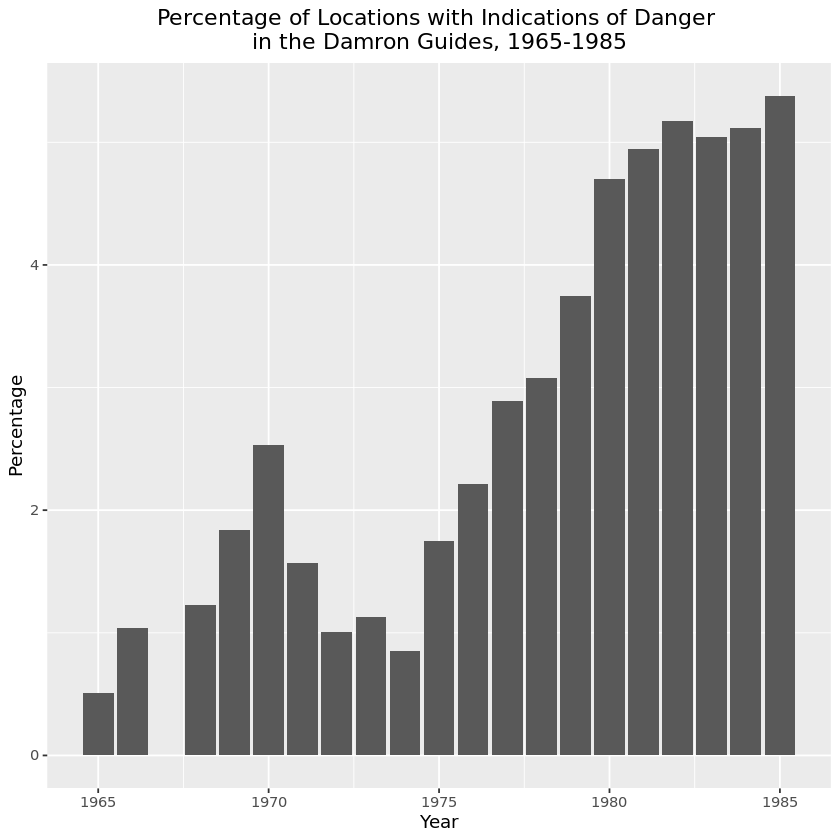

In [49]:
num.loc.by.year <- mgg %>% group_by(Year) %>% summarize(total.by.year = n())
danger.by.year <- danger %>% group_by(Year) %>% summarize(danger.total.by.year = n())
danger.by.year <- merge(danger.by.year, num.loc.by.year) %>% 
    mutate(percent.loc.dangerous = danger.total.by.year/total.by.year*100)

fig7 <- ggplot(danger.by.year, aes(x=Year, y=percent.loc.dangerous)) + 
    geom_bar(stat='identity') + 
    ggtitle("Percentage of Locations with Indications of Danger \nin the Damron Guides, 1965-1985") + 
    ylab("Percentage") + theme(plot.title = element_text(hjust = 0.5))
fig7

This steady increase occurs when looking at either AYOR or HOT entries, but the number of entries marked as Inquire Locally ebbs and flows more across time. Rather than an upward increase, the number of locations with directions to “inquire locally” peak in 1973 (22 entries) before declining throughout the 1970s before peaking one more time in 1980. Using just the guides it is hard to tell why the “inquire locally” locations peaked in 1973. It’s possible that a staffing or other issue led to trouble verifying addresses. In subsequent years there was a steady decline and by 1985 the number of spots listed in this way fell by so much that only 5 entries instructed readers to “inquire locally.” Of these remaining few entries, some are logical candidates for this designation. Places like the Emo River (a cruising area) was “very secluded.” However, others were bars like J.R.’s Why Not in Springfield, Ohio and Regina’s in Carbondale, PA which prompts questions about why their locations would have been withheld from inclusion. 

In the early 1970s as locations with directions to “inquire locally” decreased, cruisy areas began appearing in the guides. Throughout the 1970s, they were increasingly described as dangerous. The number of cruising areas increased dramatically as well going from just 165 in 1972 to 1,612 in 1985. But the proportion of cruising areas marked as dangerous grew tremendously in the early 80s. In the mid-1970s the number of locations marked AYOR or HOT hovered was about 5.6% of all cruisy locations. However, by 1981 that number jumped to just over 14% and even further to 17.4% by 1984. 

In [42]:
# percentage of crusiy locations marked as dangerous
cruisy <- mgg %>% filter(grepl("Cruisy", mgg$amenityfeatures, ignore.case = TRUE))
cruisy.danger <- cruisy %>% filter(grepl("(HOT)", cruisy$amenityfeatures, ignore.case =TRUE) | 
                                          grepl("(AYOR)", cruisy$amenityfeatures, ignore.case = TRUE))
cruisy <- cruisy %>% group_by(Year) %>% summarize(total.cruisy = n())
cruisy.danger <- cruisy.danger %>% group_by(Year) %>% summarize(total.cruisy.danger = n())
cruisy <- merge(cruisy, cruisy.danger)
cruisy <- cruisy %>% mutate(percent.dangerous = total.cruisy.danger/total.cruisy*100)

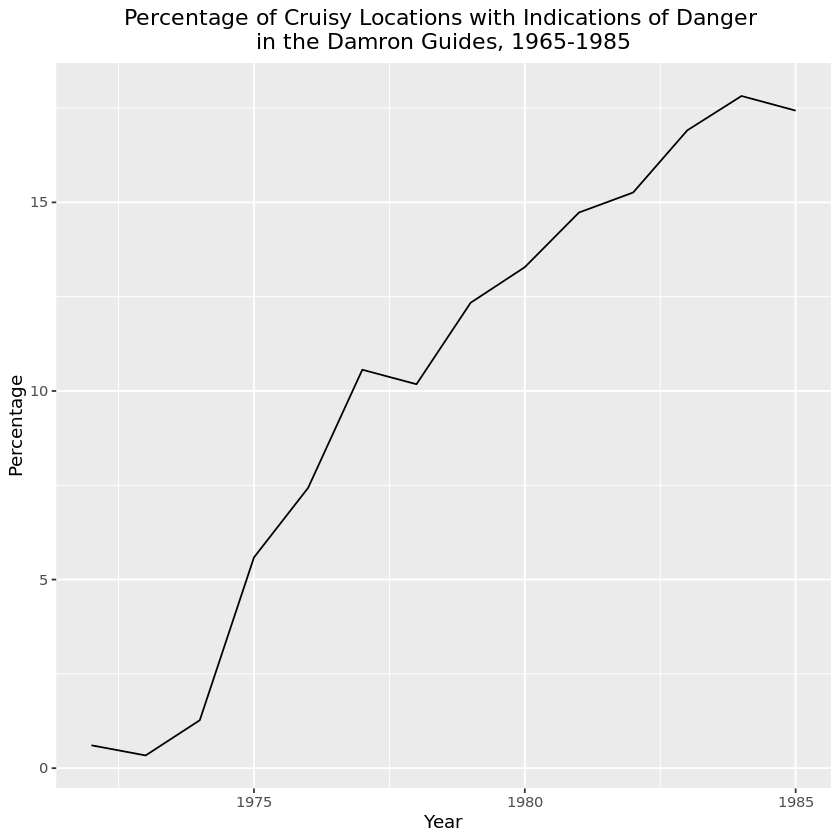

In [43]:
fig8 <- ggplot(cruisy, aes(x=Year, y=percent.dangerous)) + 
    geom_line() + 
    ggtitle("Percentage of Cruisy Locations with Indications of Danger \nin the Damron Guides, 1965-1985") + 
    ylab("Percentage") + theme(plot.title = element_text(hjust = 0.5))

fig8

What accounts for this change? While it is impossible to say conclusively, we know that the 1970s and 1980s saw both new visibility for LGBTQ Americans but also new backlash. In Jackson, the appearance of the Metropolitan Community Church (MCC) in the guides sparked outrage and calls for the prosecution of LGBTQ Americans. Rev Mike Wells, the president of the Mississippi Moral Majority, held a press conference where he “called on city officials to ‘decrease or control the activity of the homosexual element’ in Jackson, charging that homosexuals ‘openly displayed their perversion’ in the city” and he demanded the state pass new anti-sodomy laws in the next legislative session. Sandifer, still a leading activist in the community, condemned Wells and the Moral Majority on behalf of Mississippi’s gay community. He argued that not only did the “gay community [have] no intention of being intimidated” but also added that “Gay persons do not pose a threat to persons on Capital Street, at night in Smith Park, at the bars or anywhere else” (<cite data-cite="undefined"></cite>). It is notable that the first locations Sandifer mentions are those that came to be described as dangerous – cruisy locations like Smith Park and Capital Street. Of course, these locations were likely dangerous far before the moral majority began advocating for anti-sodomy laws. Reports of undercover police patrolling Smith Park pepper the Jackson Clarion Ledger (<cite data-cite="627056/F9Y6VVG9"></cite>), (<cite data-cite="627056/IRKTX278"></cite>). Nevertheless, looking at incidents like these in tandem with data from the guides suggests a larger pattern in American cities.

Reform around sex and gender was a major component of the LGBTQ Rights movement of the 1960s, 1970s, and 1980s. Not only did the era after Stonewall see decline in some police harassment, but there were also significant gains in sodomy law reform. In the 1970s twenty states joined Illinois and Connecticut in repealing their sodomy laws. Wisconsin joined them in 1983 and both New York and Pennsylvania’s Supreme Court invalidated sodomy laws.   However, even though there were significant gains, as Marc Stein notes by the 1980s sodomy was “still a crime in half of US states, the territories, military and in prisons” (<cite data-cite="627056/5WX6QQ34"></cite>), (<cite data-cite="627056/8SCHA9SR"></cite>), (<cite data-cite="627056/Q84L4CM4"></cite>), (<cite data-cite="627056/NPX5I3CU"></cite>), (<cite data-cite="627056/5LB29ENJ"></cite>). Even where sodomy laws were passed, some cities passed legislation that prevented loitering, cross dressing, or created new distinctions between same-sex and cross-sex sodomy. The Christian Right and New Right in the United States openly campaigned against the liberalization of sodomy laws and encouraged new laws that directly targeted the LGBTQ community. 

### Conclusion
The website and data behind _Mapping the Gay Guides_ are tools for scholars looking to study the contours of American gay life in the last four decades of the twentieth century. By digitizing the guides and turning into data MGG offers scholars new paths to analyzing queer life through either through the mapping visualization on the MGG website or through applying computational methods to the underlying dataset. 

The project also appears at a time that gay bars and spaces are under threat. Physical sites of gay culture like bars and bookstores seem to many queer people to be evaporating, perhaps due to the rise of a vibrant online queer culture (<cite data-cite="627056/ML3CKKEP"></cite>, <cite data-cite="627056/X6I8CZAK"></cite>). In fact, the Damron Corporation, the company that bought the Bob Damron Address Book in the late 1980s, ceased publication in 2019 after struggling throughout the 2000s and 2010s. The rise of the Internet, smartphones and apps, and specifically dating apps such as Grindr made the guides less of a necessity. For a time, the Damron company maintained an online database that was available via subscription, but the guides increasingly became a relic of a another time. Now collector's items, the guides can sell for hundreds of dollars on eBay.

MGG seeks to serve two audiences. First, and foremost, the project is a digital public history project which makes visible the presence of LGBTQ locations for members of the community. Our team frequently receives emails with stories about individual locations, corrections based on the details Damron provided, or pictures of an evening at one of the locations listed in the guides. The second audience is researchers and scholars. The MGG team is committed to making this data open source and accessible for historians, geographers, social scientists and others who are hoping to build on it or use it to bolster their own studies of queer life in America. 

As MGG looks toward wrapping up our digitization and transcription in 2024 we are excited to make additional data from the years 1990-2005 available. This additional data will make _Mapping the Gay Guides_ an even richer resource for community members and scholars. It will yield fascinating insights into the ways in which historical themes and events like the emergence of the internet and the establishment of Don’t Ask Don’t Tell influenced the communities described in the Damron Guides. Moving into the 1990s and early 2000s the guides get even longer and more detailed and we anticipate releasing at least another 75,000 locations. Moreover, it will make this data ripe for comparison with other LGBTQ guidebooks and datasets allowing scholars to better understand not only the biases within the Damron guides but the differences and similarities in queer geography for different groups. The MGG dataset will remain publicly available both for download but also as a source for the visualizations on the website. We hope it will be a resource for scholars seeking to study changes in LGBTQ life over time. 